<a href="https://colab.research.google.com/github/beyzoskaya/machineLearning_CS454/blob/main/homeworks/parametricClassification_correct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
train_data.head()

,Age,Class
0,47.363793,1
1,45.367702,1
2,43.694695,1
3,37.914666,1
4,44.416403,1


In [ ]:
test_data.head()

,Age,Class
0,37.151208,1
1,46.497973,1
2,43.480627,1
3,41.482369,1
4,48.234631,1


In [ ]:
class_priors

1    0.466667
2    0.333333
3    0.200000
Name: Class, dtype: float64

In [ ]:
x_values = train_data['Age'].values
ages_class_1 = train_data[train_data['Class'] == 1]['Age'].values
ages_class_2 = train_data[train_data['Class'] == 2]['Age'].values
ages_class_3 = train_data[train_data['Class'] == 3]['Age'].values

In [ ]:
print(likelihood_1)

0     0.055321
1     0.079231
2     0.090905
3     0.046354
4     0.087255
        ...   
65    0.083250
66    0.091617
67    0.058644
68    0.059952
69    0.069890
Name: Age, Length: 70, dtype: float64


In [ ]:
# evidence_normalization_class_1 = []
# for likelihood in likelihood_class_1:
#   evidence = likelihood*class_priors[1]
#   print(f"evidence of {likelihood} is {evidence}")
#   evidence_normalization_class_1.append(evidence)
#   likelihood = likelihood+1

evidence of 0.05532078884316314 is 0.025816368126809465
evidence of 0.07923144612835331 is 0.036974674859898214
evidence of 0.09090538712452297 is 0.042422513991444054
evidence of 0.04635396532938364 is 0.0216318504870457
evidence of 0.08725451153032797 is 0.04071877204748638
evidence of 0.0865109508134571 is 0.04037177704627998
evidence of 0.01666106840392135 is 0.007775165255163296
evidence of 0.09206179315222623 is 0.04296217013770558
evidence of 0.014977882866023239 is 0.006989678670810845
evidence of 0.08726539944249725 is 0.04072385307316539
evidence of 0.05821323456490977 is 0.027166176130291226
evidence of 0.040670779556182264 is 0.01897969712621839
evidence of 0.09137050663216931 is 0.042639569761679014
evidence of 0.05361447071989654 is 0.02502008633595172
evidence of 0.023829321925058006 is 0.011120350231693736
evidence of 0.06570461998762674 is 0.03066215599422581
evidence of 0.09148607217222511 is 0.042693500347038386
evidence of 0.059119397866483986 is 0.02758905233769252

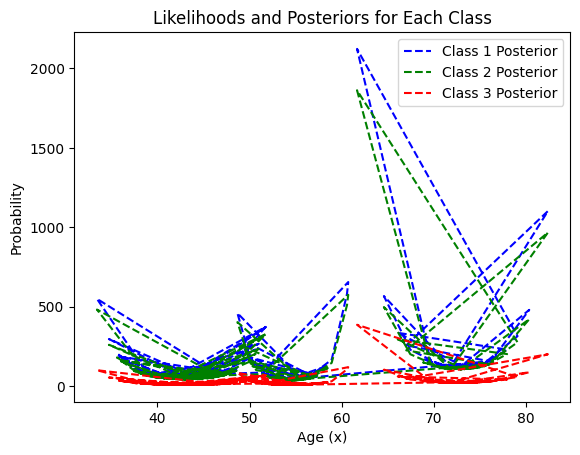

In [ ]:
import matplotlib.pyplot as plt

# Plot the likelihoods
#plt.plot(age_values_1, likelihood_class_1, label='Class 1 Likelihood', color='blue')
#plt.plot(age_values_2, likelihood_class_2, label='Class 2 Likelihood', color='green')
#plt.plot(age_values_3, likelihood_class_3, label='Class 3 Likelihood', color='red')

# Plot the posteriors
plt.plot(x_values, posterior_1, label='Class 1 Posterior', linestyle='--', color='blue')
plt.plot(x_values, posterior_2, label='Class 2 Posterior', linestyle='--', color='green')
plt.plot(x_values, posterior_3, label='Class 3 Posterior', linestyle='--', color='red')

# Set labels and title
plt.xlabel('Age (x)')
plt.ylabel('Probability')
plt.legend()
plt.title('Likelihoods and Posteriors for Each Class')

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

true_labels_train = train_data['Class'].values
n_samples = len(true_labels_train)
predicted_classes = np.zeros(n_samples, dtype=int)

for i in range(len(train_data['Age'])):

    posterior_1_p = posterior_1[i]
    posterior_2_p = posterior_2[i]
    posterior_3_p = posterior_3[i]

    if posterior_1_p >= posterior_2_p and posterior_1_p >= posterior_3_p:
        predicted_classes[i] = 1
    elif posterior_2_p >= posterior_1_p and posterior_2_p >= posterior_3_p:
        predicted_classes[i] = 2
    else:
        predicted_classes[i] = 3
    print(f"Age is : {train_data['Age'][i]}: {predicted_classes[i]}")
cm = confusion_matrix(true_labels_train, predicted_classes)

print("Confusion Matrix (Training Data):\n", cm)


Age is : 47.36379320752064: 1
Age is : 45.36770190365562: 1
Age is : 43.69469512976703: 1
Age is : 37.914665679336856: 1
Age is : 44.41640280141428: 1
Age is : 41.45568165624207: 1
Age is : 50.99938503696669: 1
Age is : 43.13871040742549: 1
Age is : 34.73549009993056: 1
Age is : 44.41476082241133: 1
Age is : 38.841044342711896: 1
Age is : 37.45236914836837: 1
Age is : 42.438188243052295: 1
Age is : 47.49615211043522: 1
Age is : 35.86829479071345: 1
Age is : 46.55042866864656: 1
Age is : 43.49757265267926: 1
Age is : 38.91146702799456: 1
Age is : 39.5230539227075: 1
Age is : 39.78490351029993: 1
Age is : 39.00311567258014: 1
Age is : 33.43595469770029: 1
Age is : 46.71083606768695: 1
Age is : 48.59815196072186: 1
Age is : 48.444055052706126: 1
Age is : 38.84834310330488: 1
Age is : 46.4965269575612: 1
Age is : 47.9565014185293: 1
Age is : 45.97551710032414: 1
Age is : 39.05903538181616: 1
Age is : 49.90380369786614: 1
Age is : 46.23155559313645: 1
Age is : 41.548345902037134: 1
Age is :

-------------------------------------------------------------------------------------------------------------------------------------------------

mean for class 1: 42.990259683238804 and variance of class 1: 18.75646559194468
mean for class 2: 54.4918735261012 and variance of class 2: 6.995796503338288
mean for class 3: 72.69169401584033 and variance of class 3: 21.108953461910815


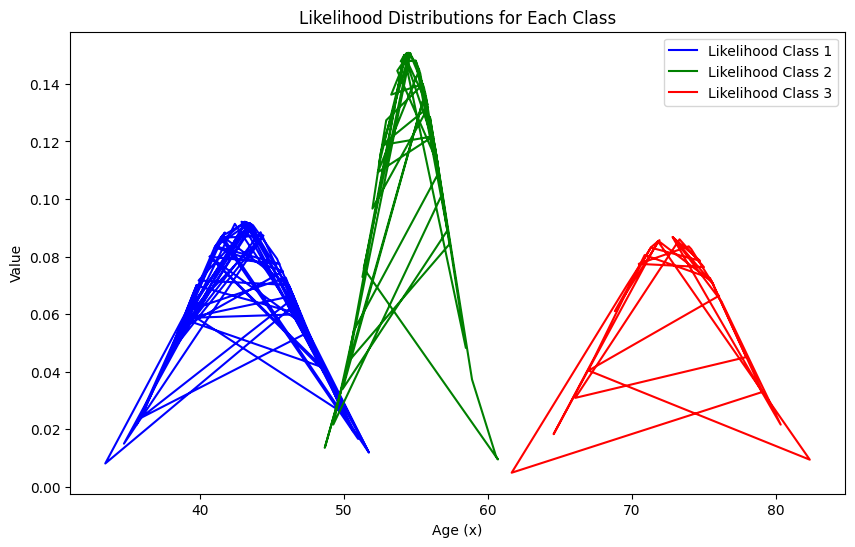

     Posterior_Class_1  Posterior_Class_2  Posterior_Class_3
0         9.509625e-01       4.903738e-02       1.610109e-07
1         9.964693e-01       3.530703e-03       9.772516e-09
2         9.997148e-01       2.851504e-04       9.171332e-10
3         1.000000e+00       6.862078e-09       2.904815e-13
4         9.991286e-01       8.713669e-04       2.542024e-09
..                 ...                ...                ...
145       1.195034e-10       1.024280e-10       1.000000e+00
146       5.761293e-12       5.869150e-13       1.000000e+00
147       1.300802e-09       4.782948e-09       1.000000e+00
148       6.529015e-08       1.701143e-06       9.999982e-01
149       5.081315e-10       1.078030e-09       1.000000e+00

[150 rows x 3 columns]


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading data
train_data = pd.read_csv("/content/data/training.csv", header=None, names=['Age', 'Class'])
test_data = pd.read_csv("/content/data/testing.csv", header=None, names=['Age', 'Class'])
#print(len(test_data))
#print(len(train_data))


# Calculate class priors
class_counts = train_data['Class'].value_counts()
class_priors = class_counts / len(train_data)
#print(class_priors)

# for calculation of mean and variances, initialize
mean_class_1 = variance_class_1 = 0
mean_class_2 = variance_class_2 = 0
mean_class_3 = variance_class_3 = 0

# Later calculations needed separate classes
#x_values = train_data[train_data['Age']]
class_1_data = train_data[train_data['Class'] == 1]
class_2_data = train_data[train_data['Class'] == 2]
class_3_data = train_data[train_data['Class'] == 3]

# Mean and variance for class 1
age_values_1 = class_1_data['Age']
mean_class_1 = age_values_1.sum() / len(age_values_1)
variance_class_1 = ((age_values_1 - mean_class_1) ** 2).sum() / (len(age_values_1) - 1)

# Mean and variance for Class 2
age_values_2 = class_2_data['Age']
mean_class_2 = age_values_2.sum() / len(age_values_2)
variance_class_2 = ((age_values_2 - mean_class_2) ** 2).sum() / (len(age_values_2) - 1)

# Mean and variance for Class 3
age_values_3 = class_3_data['Age']
mean_class_3 = age_values_3.sum() / len(age_values_3)
variance_class_3 = ((age_values_3 - mean_class_3) ** 2).sum() / (len(age_values_3) - 1)

print(f"mean for class 1: {mean_class_1} and variance of class 1: {variance_class_1}")
print(f"mean for class 2: {mean_class_2} and variance of class 2: {variance_class_2}")
print(f"mean for class 3: {mean_class_3} and variance of class 3: {variance_class_3}")

def likelihood(x, mean, variance):
    return (1 / (np.sqrt(2 * np.pi * variance))) * np.exp(-((x - mean) ** 2) / (2 * variance))

# Likelihood calculation for each class
train_data['Likelihood_Class_1'] = likelihood(train_data['Age'], mean_class_1, variance_class_1)
train_data['Likelihood_Class_2'] = likelihood(train_data['Age'], mean_class_2, variance_class_2)
train_data['Likelihood_Class_3'] = likelihood(train_data['Age'], mean_class_3, variance_class_3)

# Unnormalized posteriors for the upper part of posterior calculation
train_data['Unnormalized_Posterior_Class_1'] = train_data['Likelihood_Class_1'] * class_priors[1]
train_data['Unnormalized_Posterior_Class_2'] = train_data['Likelihood_Class_2'] * class_priors[2]
train_data['Unnormalized_Posterior_Class_3'] = train_data['Likelihood_Class_3'] * class_priors[3]

# Normalization is needed because all classes have different number of samples in the dataset
evidence = train_data[['Unnormalized_Posterior_Class_1', 'Unnormalized_Posterior_Class_2', 'Unnormalized_Posterior_Class_3']].sum(axis=1)
train_data['Posterior_Class_1'] = train_data['Unnormalized_Posterior_Class_1'] / evidence
train_data['Posterior_Class_2'] = train_data['Unnormalized_Posterior_Class_2'] / evidence
train_data['Posterior_Class_3'] = train_data['Unnormalized_Posterior_Class_3'] / evidence

plt.figure(figsize=(10, 6))

# Likelihood plotting
plt.plot(train_data[train_data['Class']==1]['Age'], train_data[train_data['Class'] == 1]['Likelihood_Class_1'], label='Likelihood Class 1', color='blue')
plt.plot(train_data[train_data['Class']==2]['Age'], train_data[train_data['Class'] == 2]['Likelihood_Class_2'], label='Likelihood Class 2', color='green')
plt.plot(train_data[train_data['Class']==3]['Age'], train_data[train_data['Class'] == 3]['Likelihood_Class_3'], label='Likelihood Class 3', color='red')

# Posterior plotting
#plt.plot(train_data[train_data['Class'] == 1]['Age'], train_data[train_data['Class'] == 1]['Posterior_Class_1'], linestyle='--', label='Posterior Class 1', color='blue')
#plt.plot(train_data[train_data['Class'] == 2]['Age'], train_data[train_data['Class'] == 2]['Posterior_Class_2'], linestyle='--', label='Posterior Class 2', color='green')
#plt.plot(train_data[train_data['Class'] == 3]['Age'], train_data[train_data['Class'] == 3]['Posterior_Class_3'], linestyle='--', label='Posterior Class 3', color='red')

plt.xlabel('Age (x)')
plt.ylabel('Value')
plt.legend()
plt.title('Likelihood Distributions for Each Class')
plt.show()


# Print normalized posteriors for comparison with training posteriors
print(train_data[['Posterior_Class_1', 'Posterior_Class_2', 'Posterior_Class_3']])

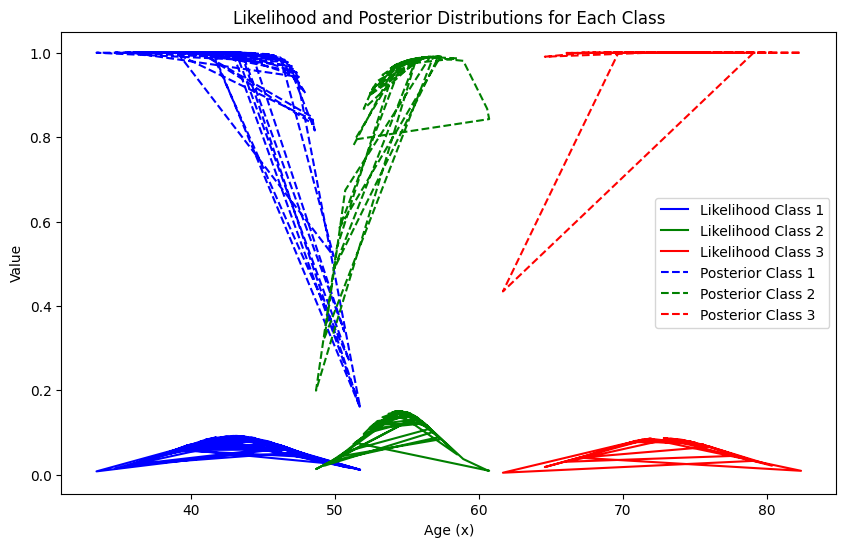

In [50]:

plt.figure(figsize=(10, 6))


plt.plot(train_data[train_data['Class']==1]['Age'], train_data[train_data['Class'] == 1]['Likelihood_Class_1'], label='Likelihood Class 1', color='blue')
plt.plot(train_data[train_data['Class']==2]['Age'], train_data[train_data['Class'] == 2]['Likelihood_Class_2'], label='Likelihood Class 2', color='green')
plt.plot(train_data[train_data['Class']==3]['Age'], train_data[train_data['Class'] == 3]['Likelihood_Class_3'], label='Likelihood Class 3', color='red')


plt.plot(train_data[train_data['Class'] == 1]['Age'], train_data[train_data['Class'] == 1]['Posterior_Class_1'], linestyle='--', label='Posterior Class 1', color='blue')
plt.plot(train_data[train_data['Class'] == 2]['Age'], train_data[train_data['Class'] == 2]['Posterior_Class_2'], linestyle='--', label='Posterior Class 2', color='green')
plt.plot(train_data[train_data['Class'] == 3]['Age'], train_data[train_data['Class'] == 3]['Posterior_Class_3'], linestyle='--', label='Posterior Class 3', color='red')

plt.xlabel('Age (x)')
plt.ylabel('Value')
plt.legend()
plt.title('Likelihood and Posterior Distributions for Each Class')
plt.show()


Confusion Matrix for Training Data:
[[66  4  0]
 [ 3 47  0]
 [ 0  1 29]]


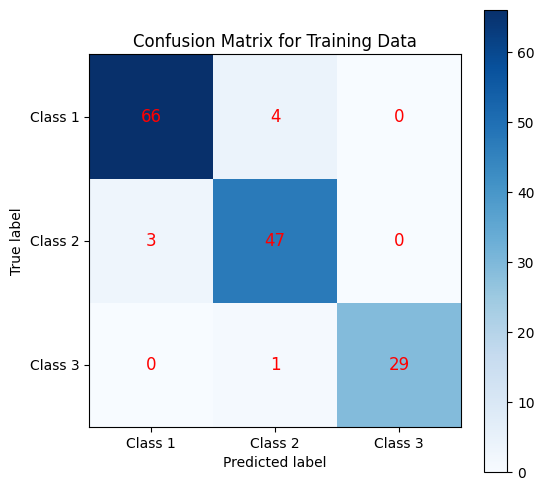

In [54]:
from sklearn.metrics import confusion_matrix

# True labels should came from dataset --> TODO: control the type of train_data['Class']
# CAN'T work without 'int'
#print(train_data['Class'].astype(int))

train_true_classes = train_data['Class'].astype(int)
train_data['Predicted_Class'] = train_data[['Posterior_Class_1', 'Posterior_Class_2', 'Posterior_Class_3']].idxmax(axis=1)


train_data['Predicted_Class'] = train_data['Predicted_Class'].str.extract('(\d+)').astype(int)
#print(test_data[['Posterior_Class_1', 'Posterior_Class_2', 'Posterior_Class_3']])

confusion_matrix_train = confusion_matrix(train_true_classes, train_data['Predicted_Class'])
print("Confusion Matrix for Training Data:")
print(confusion_matrix_train)

# Display from library
plt.figure(figsize=(6, 6))
plt.imshow(confusion_matrix_train, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Training Data')
plt.colorbar()

# Add labels to the confusion matrix
classes = ['Class 1', 'Class 2', 'Class 3']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add numbers inside of the matrix
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(confusion_matrix_train[i, j]), ha='center', va='center', color='red', fontsize=12)


plt.show()

     Posterior_Class_1  Posterior_Class_2  Posterior_Class_3
0         1.000000e+00       1.346351e-09       1.017042e-13
1         9.834155e-01       1.658446e-02       4.825509e-08
2         9.997971e-01       2.028804e-04       6.781508e-10
3         9.999931e-01       6.933799e-06       4.101549e-11
4         8.708517e-01       1.291477e-01       5.147431e-07
..                 ...                ...                ...
145       3.378850e-20       6.839761e-30       1.000000e+00
146       1.381145e-07       4.919480e-06       9.999949e-01
147       6.442520e-10       1.574957e-09       1.000000e+00
148       1.214544e-06       9.557120e-05       9.999032e-01
149       7.929704e-09       7.699483e-08       9.999999e-01

[150 rows x 3 columns]
Confusion Matrix for Test Data:
[[67  3  0]
 [ 2 47  1]
 [ 0  0 30]]


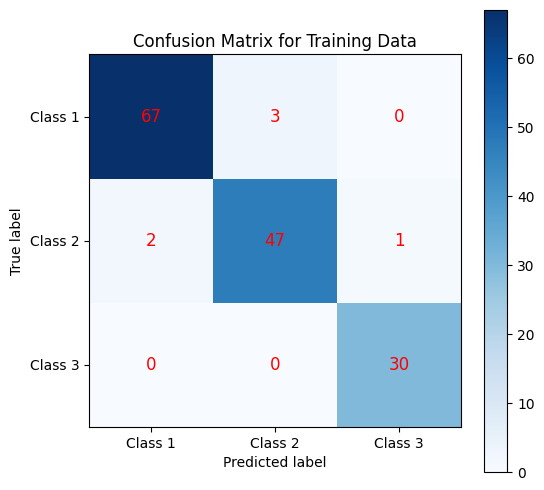

In [55]:
# Repeat same steps for training
# Start from the calculation of likelihoods
# Mean and variance are estimators (in this case model actually)

class_1_data_test = test_data[test_data['Class'] == 1]
class_2_data_test = test_data[test_data['Class'] == 2]
class_3_data_test = test_data[test_data['Class'] == 3]

age_values_1 = class_1_data_test['Age']
age_values_2 = class_2_data_test['Age']
age_values_3 = class_3_data_test['Age']

test_data['Likelihood_Class_1'] = likelihood(test_data['Age'], mean_class_1, variance_class_1)
test_data['Likelihood_Class_2'] = likelihood(test_data['Age'], mean_class_2, variance_class_2)
test_data['Likelihood_Class_3'] = likelihood(test_data['Age'], mean_class_3, variance_class_3)


test_data['Unnormalized_Posterior_Class_1'] = test_data['Likelihood_Class_1'] * class_priors[1]
test_data['Unnormalized_Posterior_Class_2'] = test_data['Likelihood_Class_2'] * class_priors[2]
test_data['Unnormalized_Posterior_Class_3'] = test_data['Likelihood_Class_3'] * class_priors[3]

evidence_test = test_data[['Unnormalized_Posterior_Class_1', 'Unnormalized_Posterior_Class_2', 'Unnormalized_Posterior_Class_3']].sum(axis=1)
test_data['Posterior_Class_1'] = test_data['Unnormalized_Posterior_Class_1'] / evidence_test
test_data['Posterior_Class_2'] = test_data['Unnormalized_Posterior_Class_2'] / evidence_test
test_data['Posterior_Class_3'] = test_data['Unnormalized_Posterior_Class_3'] / evidence_test


print(test_data[['Posterior_Class_1', 'Posterior_Class_2', 'Posterior_Class_3']])

test_true_classes = test_data['Class'].astype(int)

test_data['Predicted_Class'] = test_data[['Posterior_Class_1', 'Posterior_Class_2', 'Posterior_Class_3']].idxmax(axis=1)
test_data['Predicted_Class'] = test_data['Predicted_Class'].str.extract('(\d+)').astype(int)


confusion_matrix_test = confusion_matrix(test_true_classes, test_data['Predicted_Class'])
print("Confusion Matrix for Test Data:")
print(confusion_matrix_test)


plt.figure(figsize=(6, 6))
plt.imshow(confusion_matrix_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Training Data')
plt.colorbar()


classes = ['Class 1', 'Class 2', 'Class 3']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(confusion_matrix_test[i, j]), ha='center', va='center', color='red', fontsize=12)


plt.show()

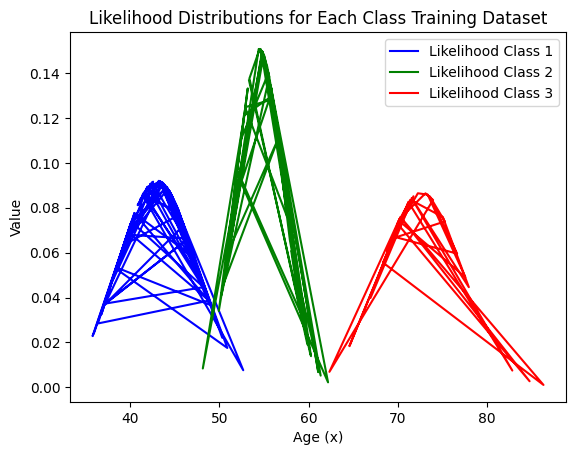

In [56]:
plt.plot(test_data[test_data['Class']==1]['Age'], test_data[train_data['Class'] == 1]['Likelihood_Class_1'], label='Likelihood Class 1', color='blue')
plt.plot(test_data[test_data['Class']==2]['Age'], test_data[train_data['Class'] == 2]['Likelihood_Class_2'], label='Likelihood Class 2', color='green')
plt.plot(test_data[test_data['Class']==3]['Age'], test_data[train_data['Class'] == 3]['Likelihood_Class_3'], label='Likelihood Class 3', color='red')

plt.xlabel('Age (x)')
plt.ylabel('Value')
plt.legend()
plt.title('Likelihood Distributions for Each Class Training Dataset')
plt.show()
